## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman1Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 1


## Dataset 


In [5]:
#Parameters 
n_features = 5
n_samples= 100
n_target = 1 

In [6]:
X,Y = friedman1Dataset.friedman1_data(n_samples,n_features)

         X0        X1        X2        X3        X4         Y
0 -0.926577 -1.384998 -0.575490  0.882951  0.796789 -0.393832
1 -1.633050  0.625195 -0.049495  1.374092  1.315924  0.157384
2 -0.865124  0.568136 -0.304428 -0.321051  0.573327 -0.286308
3  0.887624 -0.266074  0.129396  0.846212  0.547146  0.923144
4 -0.818440 -1.100134  0.077847  1.332024 -0.222558 -0.376160


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.024897
0:	learn: 1.0466724	total: 67ms	remaining: 1m 6s
1:	learn: 1.0372011	total: 67.7ms	remaining: 33.8s
2:	learn: 1.0254515	total: 68.2ms	remaining: 22.7s
3:	learn: 1.0142200	total: 68.7ms	remaining: 17.1s
4:	learn: 1.0045016	total: 69.2ms	remaining: 13.8s
5:	learn: 0.9941014	total: 69.7ms	remaining: 11.6s
6:	learn: 0.9828613	total: 70.2ms	remaining: 9.96s
7:	learn: 0.9724352	total: 71.7ms	remaining: 8.89s
8:	learn: 0.9618133	total: 73ms	remaining: 8.04s
9:	learn: 0.9504003	total: 73.5ms	remaining: 7.28s
10:	learn: 0.9410415	total: 74.1ms	remaining: 6.66s
11:	learn: 0.9306353	total: 74.5ms	remaining: 6.14s
12:	learn: 0.9212673	total: 75ms	remaining: 5.7s
13:	learn: 0.9104457	total: 75.4ms	remaining: 5.31s
14:	learn: 0.9032553	total: 76.1ms	remaining: 5s
15:	learn: 0.8947798	total: 76.5ms	remaining: 4.71s
16:	learn: 0.8861208	total: 77ms	remaining: 4.45s
17:	learn: 0.8772636	total: 77.5ms	remaining: 4.23s
18:	learn: 0.8695237	total: 78ms	remaining: 4.03s
19:	le

83:	learn: 0.4851664	total: 108ms	remaining: 1.18s
84:	learn: 0.4811233	total: 109ms	remaining: 1.17s
85:	learn: 0.4772408	total: 109ms	remaining: 1.16s
86:	learn: 0.4739966	total: 110ms	remaining: 1.15s
87:	learn: 0.4702818	total: 110ms	remaining: 1.14s
88:	learn: 0.4669165	total: 111ms	remaining: 1.13s
89:	learn: 0.4640290	total: 111ms	remaining: 1.13s
90:	learn: 0.4602308	total: 112ms	remaining: 1.12s
91:	learn: 0.4558240	total: 112ms	remaining: 1.11s
92:	learn: 0.4525965	total: 113ms	remaining: 1.1s
93:	learn: 0.4493113	total: 113ms	remaining: 1.09s
94:	learn: 0.4462569	total: 114ms	remaining: 1.08s
95:	learn: 0.4426594	total: 114ms	remaining: 1.08s
96:	learn: 0.4397056	total: 115ms	remaining: 1.07s
97:	learn: 0.4362930	total: 115ms	remaining: 1.06s
98:	learn: 0.4326612	total: 116ms	remaining: 1.06s
99:	learn: 0.4298330	total: 117ms	remaining: 1.05s
100:	learn: 0.4267460	total: 117ms	remaining: 1.04s
101:	learn: 0.4241105	total: 118ms	remaining: 1.03s
102:	learn: 0.4210246	total: 1

246:	learn: 0.1568395	total: 188ms	remaining: 573ms
247:	learn: 0.1556796	total: 189ms	remaining: 572ms
248:	learn: 0.1547459	total: 189ms	remaining: 570ms
249:	learn: 0.1534666	total: 190ms	remaining: 569ms
250:	learn: 0.1531103	total: 190ms	remaining: 567ms
251:	learn: 0.1521364	total: 191ms	remaining: 566ms
252:	learn: 0.1511351	total: 191ms	remaining: 564ms
253:	learn: 0.1500583	total: 191ms	remaining: 562ms
254:	learn: 0.1488889	total: 192ms	remaining: 561ms
255:	learn: 0.1478166	total: 192ms	remaining: 559ms
256:	learn: 0.1475657	total: 193ms	remaining: 558ms
257:	learn: 0.1472873	total: 194ms	remaining: 557ms
258:	learn: 0.1462679	total: 194ms	remaining: 555ms
259:	learn: 0.1451096	total: 194ms	remaining: 553ms
260:	learn: 0.1441188	total: 195ms	remaining: 552ms
261:	learn: 0.1432379	total: 195ms	remaining: 550ms
262:	learn: 0.1424741	total: 196ms	remaining: 549ms
263:	learn: 0.1415979	total: 196ms	remaining: 547ms
264:	learn: 0.1406271	total: 197ms	remaining: 546ms
265:	learn: 

466:	learn: 0.0543580	total: 291ms	remaining: 333ms
467:	learn: 0.0542774	total: 292ms	remaining: 332ms
468:	learn: 0.0539643	total: 293ms	remaining: 331ms
469:	learn: 0.0536262	total: 293ms	remaining: 331ms
470:	learn: 0.0532954	total: 294ms	remaining: 330ms
471:	learn: 0.0530080	total: 294ms	remaining: 329ms
472:	learn: 0.0526864	total: 294ms	remaining: 328ms
473:	learn: 0.0523734	total: 295ms	remaining: 327ms
474:	learn: 0.0520620	total: 295ms	remaining: 326ms
475:	learn: 0.0517363	total: 296ms	remaining: 326ms
476:	learn: 0.0514342	total: 296ms	remaining: 325ms
477:	learn: 0.0510580	total: 297ms	remaining: 324ms
478:	learn: 0.0507616	total: 297ms	remaining: 323ms
479:	learn: 0.0504033	total: 298ms	remaining: 322ms
480:	learn: 0.0501397	total: 298ms	remaining: 322ms
481:	learn: 0.0498539	total: 299ms	remaining: 321ms
482:	learn: 0.0495504	total: 299ms	remaining: 320ms
483:	learn: 0.0491930	total: 300ms	remaining: 320ms
484:	learn: 0.0488439	total: 300ms	remaining: 319ms
485:	learn: 

603:	learn: 0.0267464	total: 371ms	remaining: 243ms
604:	learn: 0.0266347	total: 372ms	remaining: 243ms
605:	learn: 0.0265214	total: 372ms	remaining: 242ms
606:	learn: 0.0264118	total: 373ms	remaining: 241ms
607:	learn: 0.0263215	total: 373ms	remaining: 241ms
608:	learn: 0.0261630	total: 374ms	remaining: 240ms
609:	learn: 0.0260559	total: 374ms	remaining: 239ms
610:	learn: 0.0259686	total: 374ms	remaining: 238ms
611:	learn: 0.0258142	total: 375ms	remaining: 238ms
612:	learn: 0.0256703	total: 376ms	remaining: 237ms
613:	learn: 0.0255671	total: 376ms	remaining: 237ms
614:	learn: 0.0254792	total: 377ms	remaining: 236ms
615:	learn: 0.0254044	total: 377ms	remaining: 235ms
616:	learn: 0.0252934	total: 378ms	remaining: 234ms
617:	learn: 0.0252061	total: 378ms	remaining: 234ms
618:	learn: 0.0251331	total: 379ms	remaining: 233ms
619:	learn: 0.0250317	total: 379ms	remaining: 232ms
620:	learn: 0.0248684	total: 380ms	remaining: 232ms
621:	learn: 0.0247720	total: 380ms	remaining: 231ms
622:	learn: 

812:	learn: 0.0114046	total: 476ms	remaining: 109ms
813:	learn: 0.0113779	total: 476ms	remaining: 109ms
814:	learn: 0.0113205	total: 477ms	remaining: 108ms
815:	learn: 0.0112655	total: 477ms	remaining: 108ms
816:	learn: 0.0112394	total: 478ms	remaining: 107ms
817:	learn: 0.0111841	total: 478ms	remaining: 106ms
818:	learn: 0.0111198	total: 478ms	remaining: 106ms
819:	learn: 0.0110670	total: 479ms	remaining: 105ms
820:	learn: 0.0110108	total: 479ms	remaining: 105ms
821:	learn: 0.0109556	total: 480ms	remaining: 104ms
822:	learn: 0.0109058	total: 480ms	remaining: 103ms
823:	learn: 0.0108921	total: 481ms	remaining: 103ms
824:	learn: 0.0108366	total: 481ms	remaining: 102ms
825:	learn: 0.0107859	total: 482ms	remaining: 101ms
826:	learn: 0.0107376	total: 482ms	remaining: 101ms
827:	learn: 0.0106835	total: 482ms	remaining: 100ms
828:	learn: 0.0106589	total: 483ms	remaining: 99.6ms
829:	learn: 0.0106118	total: 483ms	remaining: 99ms
830:	learn: 0.0105626	total: 484ms	remaining: 98.4ms
831:	learn:

979:	learn: 0.0057754	total: 554ms	remaining: 11.3ms
980:	learn: 0.0057574	total: 555ms	remaining: 10.7ms
981:	learn: 0.0057518	total: 555ms	remaining: 10.2ms
982:	learn: 0.0057300	total: 555ms	remaining: 9.61ms
983:	learn: 0.0057091	total: 556ms	remaining: 9.04ms
984:	learn: 0.0056780	total: 556ms	remaining: 8.47ms
985:	learn: 0.0056671	total: 557ms	remaining: 7.91ms
986:	learn: 0.0056390	total: 558ms	remaining: 7.34ms
987:	learn: 0.0056336	total: 558ms	remaining: 6.78ms
988:	learn: 0.0056103	total: 559ms	remaining: 6.21ms
989:	learn: 0.0056043	total: 559ms	remaining: 5.65ms
990:	learn: 0.0055944	total: 560ms	remaining: 5.08ms
991:	learn: 0.0055741	total: 560ms	remaining: 4.52ms
992:	learn: 0.0055442	total: 560ms	remaining: 3.95ms
993:	learn: 0.0055190	total: 561ms	remaining: 3.38ms
994:	learn: 0.0054992	total: 561ms	remaining: 2.82ms
995:	learn: 0.0054896	total: 562ms	remaining: 2.26ms
996:	learn: 0.0054626	total: 562ms	remaining: 1.69ms
997:	learn: 0.0054532	total: 563ms	remaining: 

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

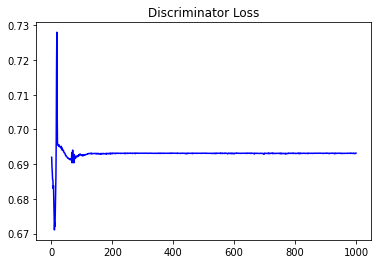

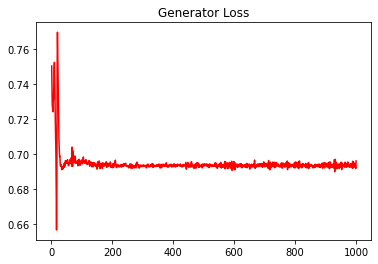

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.10144078776529318


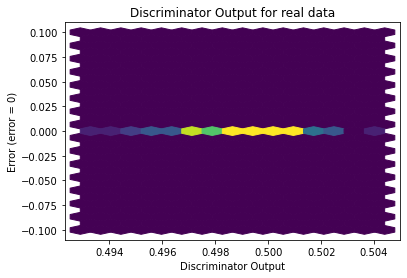

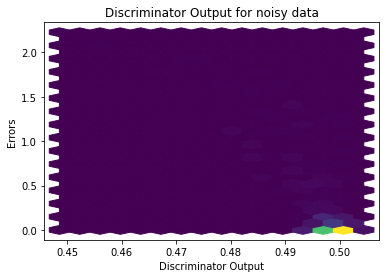

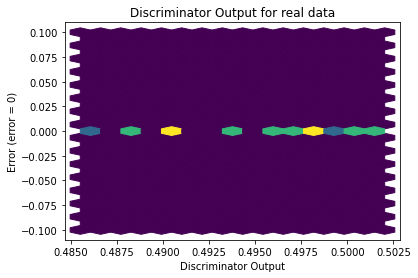

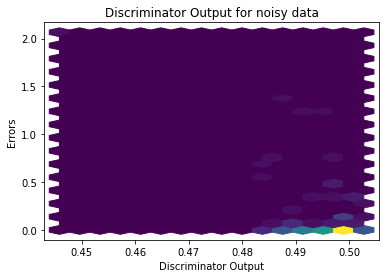

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


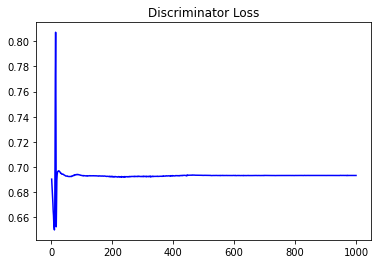

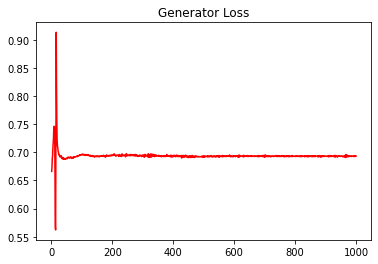

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.07682493708728198


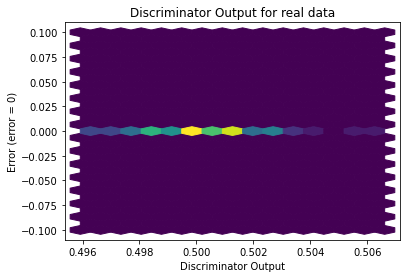

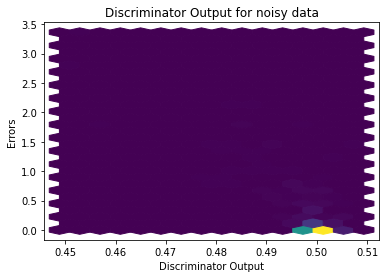

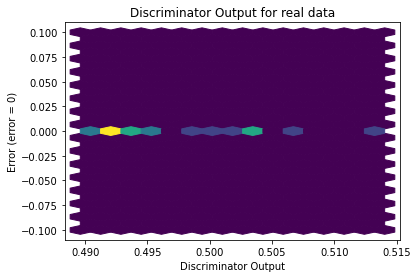

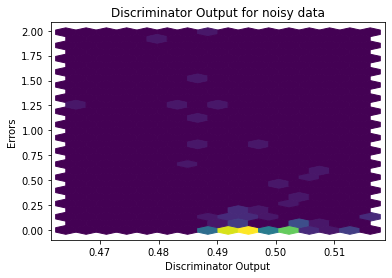

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.0672]], requires_grad=True)
